In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv(r'dataplant.csv')
data=data.drop(columns=['Unnamed: 0'])
data=data.dropna()
data.head()

,prefLabel,LABEL
0,Acne,DISEASE
1,acne vulgaris,DISEASE
2,Acne conglobata,DISEASE
3,Acne fulminans,DISEASE
4,Acne Keloidalis Nuchae,DISEASE


In [4]:
X_train, X_test, y_train, y_test = train_test_split(data['prefLabel'], data['LABEL'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Accuracy: 0.88


In [5]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[[ 149    0    0    9    0]
 [   0  730    0  249    0]
 [   0    0    4    3    0]
 [   0    2    0 1098    0]
 [   0    0    0   12   16]]


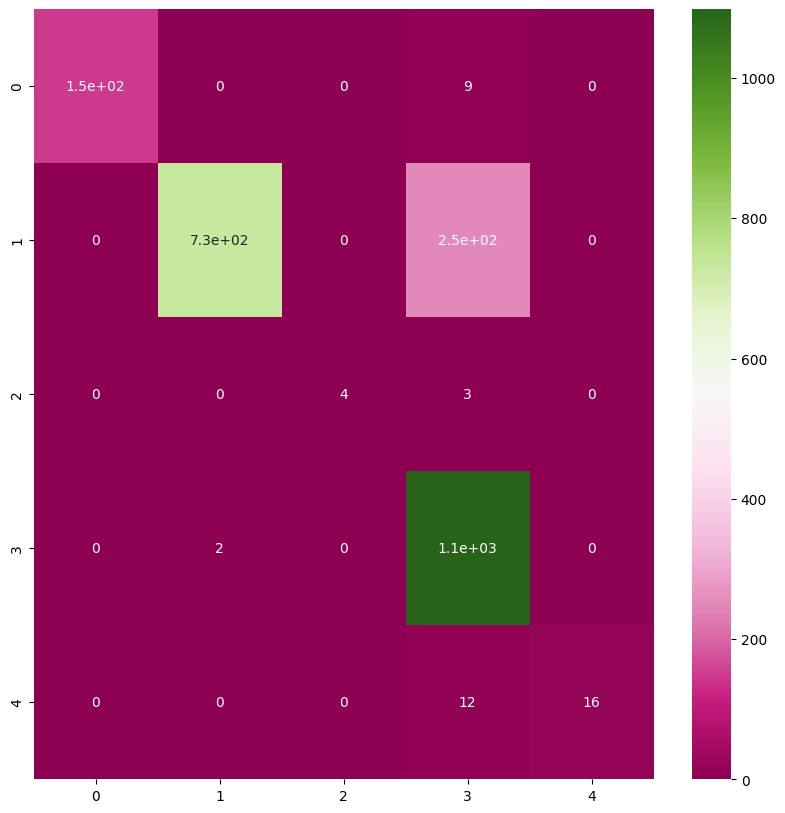

In [6]:
plt.figure(figsize=(10,10))
c_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(c_matrix,cmap='PiYG',annot=True)

print(c_matrix)

In [7]:
c_report=classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

    ACTIVITY       1.00      0.94      0.97       158
   CHEMICALS       1.00      0.75      0.85       979
     DISEASE       1.00      0.57      0.73         7
      PLANTS       0.80      1.00      0.89      1100
     TARGETS       1.00      0.57      0.73        28

    accuracy                           0.88      2272
   macro avg       0.96      0.77      0.83      2272
weighted avg       0.90      0.88      0.88      2272



In [8]:
new_disease_names = ["daphne argyi"]
new_disease_names_tfidf = tfidf_vectorizer.transform(new_disease_names)
predicted_labels = classifier.predict(new_disease_names_tfidf)
print("Predicted Labels:", predicted_labels)

Predicted Labels: ['PLANTS']


In [10]:
X_test_tfidf

<2272x6755 sparse matrix of type '<class 'numpy.float64'>'
	with 3829 stored elements in Compressed Sparse Row format>